# Logistic Regression

Example that explains the logistic regression ideas.

In this example we'll be using

* `NumPy`
* `pandas`
* `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

%matplotlib inline

Let's read the dataset first. It was taken from [Andrew Ng’s Machine Learning course on Coursera](https://github.com/animesh-agarwal/Machine-Learning/blob/master/LogisticRegression/data/marks.txt).

It contains marks of two exams for 100 applicants. The target value take `0` or `1` (was applicant admitted or not)

In [2]:
url = "https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/master/LogisticRegression/data/marks.txt"
content = requests.get(url).content

data = pd.read_csv(io.StringIO(content.decode('utf-8')), header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Let's separate features from target labels. And then try to visualize two classes of applicants

In [3]:
X = data.iloc[:, :-1]
y_label = data.iloc[:, -1]

admitted = data.loc[y_label == 1]
not_admitted = data.loc[y_label == 0]




## What is logistic regression?

First of all, we make a suggestion that probability of event $$y = 1$$

$$P\{y = 1 | x\} = f(h)$$

From linear regression task we know that

$$h(x)=h(x)=\Theta^Tx$$

What is `f(h)`?

This is sigmoid function applied to the result

$$f(h) = \frac{1}{1 + e^{-h}}$$

`y` can take only 0 or 1. So, the probability for 0 will be

$$P\{y = 0 | x\} = 1 - f(h)$$.

In the consequences it can be written as

$$P\{y | x\} = f(h)^y(1 - f(h))^{(1 - y)}$$

That is Bernoulli distribution.

We need to find

$$\hat{\Theta }=argmax_{\Theta }L(\Theta) = \prod_{i=1}^{m}P\{y=y^{(i)} | x=x^{(i)}\}$$

Maximisation of likelihood function is equivalent to maximisation of its logarithm

$$lnL(\Theta)=\sum_{i=1}^{m}lnP\{y=y^{(i)} | x=x^{(i)}\}=\sum_{i=1}^{m}y^{(i)}lnf(h) + (1 - y^{(i)})ln(1 - f(h))$$

We'll solve this by gradient descend method, so we'll update Theta respectively

$$\Theta := \Theta + \alpha \triangledown lnL(\Theta)$$

Let's create our training sets.

## Why do we append the list of ones to `train_x`?

So, the formula of line is

$$d=\Theta_0 + \Theta_1x_1 + \Theta_2x_2$$

Theta with index 0 corresponds to interception with `y`. So, we prepend column of ones to features set for convenience in matrix computations.

In [4]:
train_x = np.hstack((np.ones(shape=(len(X), 1)), np.array(X)))
train_y = np.array(y_label).reshape(len(y_label), 1)

train_x.shape, train_y.shape

((100, 3), (100, 1))

Define helping functions.

* Sigmoid activation function
* Accuracy calculation function

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def accuracy(d: np.ndarray, y: np.ndarray, threshold=0.5):
    def _l(e):
        if e > threshold:
            return 1
        return 0
    _d = np.array(list(map(_l, d))).reshape(y.shape)
    return (y == _d).mean()


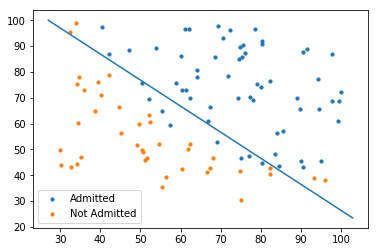

In [7]:
plot_x1 = np.linspace(np.min(train_x[:, 1]) - 3, np.max(train_x[:, 1]) + 3, 50)
plot_x2 = (-theta[0] - theta[1] * plot_x1) / theta[2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.plot(plot_x1, plot_x2)
plt.legend()

Accuracy: 0.88
Theta:
[[-59.81344921]
 [  0.47421549]
 [  0.46996537]]


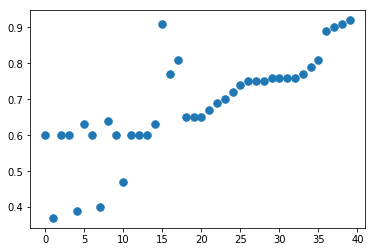

In [6]:
theta = np.random.uniform(-0.5, 0.5, size=(train_x.shape[1], 1))

EPOCHS = 200_000
EVERY = 5000

accuracies = []

learning_rate = 0.01
m = len(train_y)

for i in range(EPOCHS):
    h = train_x.dot(theta)
    a = sigmoid(h)

    grad = train_x.T.dot(a - train_y)
    theta -= learning_rate * grad / m
    
    if i % EVERY == 0:
        accuracies.append(accuracy(sigmoid(train_x.dot(theta)), train_y))

print(f"Accuracy: {accuracy(sigmoid(train_x.dot(theta)), train_y)}")
print("Theta:")
print(theta)
plt.plot(accuracies, marker='.', ms=15, lw=0)


## Plotting the classification line

The equation of separating hyperplane is

$$h(x)=\Theta_0 + \Theta_1x_1 + \Theta_2x_2$$

From linear algebra and our smart brains we know that separation line will have equation

$$x_2 = \frac{-\Theta_0 - \Theta_1x_1}{\Theta_2}$$

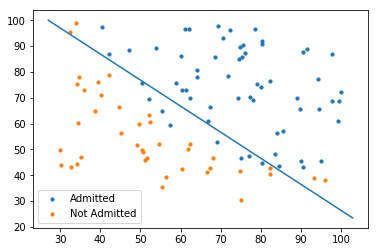

In [7]:
plot_x1 = np.linspace(np.min(train_x[:, 1]) - 3, np.max(train_x[:, 1]) + 3, 50)
plot_x2 = (-theta[0] - theta[1] * plot_x1) / theta[2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.plot(plot_x1, plot_x2)
plt.legend()

## Resources

* [Building a Logistic Regression in Python](https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24)

* [Logistic Regression from scratch in Python](https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac)

* [Shameless self-promotion](https://github.com/MikhailKravets/Spytnik) (but I really took some material from there)